In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

#### load and train_test_split data

In [2]:
iris = datasets.load_iris()
# print(iris)

X = iris.data
Y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


#### apply Knn classifier with different values of "k"

Text(0, 0.5, 'Accuracy')

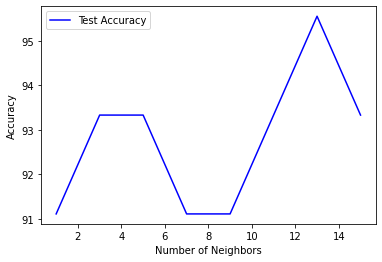

In [18]:
K = [1, 3, 5, 7, 9, 11, 13, 15]
acc_test = np.empty(len(K))

for i, k in enumerate(K):
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = np.count_nonzero(y_pred == y_test) / len(y_test) * 100
    acc_test[i] =accuracy
#     print(accuracy)

n = np.arange(1, 16, 2)
plt.plot(n, acc_test  , label = 'Test Accuracy', color='blue' )   
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

#### Confusion Matrix for predicted values with k = 5

In [12]:
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

class0_class0 = len(np.where((y_pred == 0) & (y_test == 0))[0])
class1_class1 = len(np.where((y_pred == 1) & (y_test == 1))[0])
class2_class2 = len(np.where((y_pred == 2) & (y_test == 2))[0])

class0_class1 = len(np.where((y_pred == 1) & (y_test == 0))[0])
class0_class2 = len(np.where((y_pred == 2) & (y_test == 0))[0])

class1_class0 = len(np.where((y_pred == 0) & (y_test == 1))[0])
class1_class2 = len(np.where((y_pred == 2) & (y_test == 1))[0])

class2_class0 = len(np.where((y_pred == 0) & (y_test == 2))[0])
class2_class1 = len(np.where((y_pred == 1) & (y_test == 2))[0])

conf_mat = np.array([[class0_class0, class0_class1, class0_class2], 
                     [class1_class0, class1_class1, class1_class2],
                     [class2_class0, class2_class1, class2_class2]])
print(conf_mat)



[[15  0  0]
 [ 0 14  2]
 [ 0  1 13]]


<AxesSubplot:>

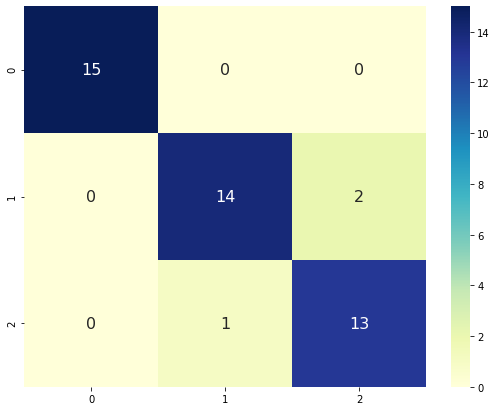

In [19]:
import seaborn as sn

df_cm = pd.DataFrame(conf_mat, range(3), range(3))
plt.figure(figsize=(9,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu") # font size


Text(0, 0.5, 'Actuals')

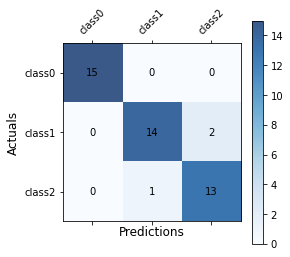

In [14]:
plt.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.8)

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        
        plt.annotate(str(conf_mat[i][j]), xy=(j, i), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.colorbar()
classes = ['class0', 'class1', 'class2']
plt.xticks(range(len(classes)), classes, rotation=45)
plt.yticks(range(len(classes)), classes)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)